<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

#### Input Layer: Input layer consists of number of units and each unit represents individual features from the dataset that will be passed to the model.
#### Hidden Layer: Hidden layer is a layer to which all units from input layer are connected. Output (input multiplied to the assigned weight of this input with added bias) from input layer is transfered via that connection to hidden layer for further computation.
#### Output Layer: Output layer consists of units which represent possible categories for the output. For example, if the task to recognize images with apple and strawberry, there will be two possible outcomes.
#### Neuron: is a one of the units in the layers which hold the number between 0 and 1.
#### Weight: parameter, positive or negative number, assigned to each of the connections between neurons.
#### Activation Function: Is function that computes input values in hidden layer. It can be any function, such as sigmoid, ReLU and others.
#### Node Map: is a flow chart in that it shows the path from inputs to outputs
#### Perceptron: is like a binary linear function, linear classifier that can decide if input belongs to the particular class.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### First, input layer takes features from dataset as an inputs. Each input multiplies by weight, sums all of these products up and adds bias, then transfers to hidden layer for further computation. Before passing to the last output layer, data may go through the ativation function in each neuron, which can be sigmoid, ReLU and others before it outputs the result. 

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [57]:
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [65]:
df.T

,0,1,2,3
x1,0,1,0,1
x2,0,0,1,1
y,1,1,1,0


In [58]:
correct_outputs = [[0],[1],[0],[1]]

In [6]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  sx = sigmoid(x)
  return sx*(1-sx)

In [71]:
weights = 2 * np.random.random((3,1)) - 1
weights

array([[ 0.46026931],
       [-0.11424282],
       [ 0.85483923]])

In [72]:
# Weighted sum 
weighted_sum = np.dot(df, weights)
weighted_sum

array([[0.85483923],
       [1.31510855],
       [0.74059641],
       [0.34602649]])

In [73]:
# Activate
activated_outputs = sigmoid(weighted_sum)
activated_outputs

array([[0.7015813 ],
       [0.78836675],
       [0.67712626],
       [0.58565368]])

In [74]:
# Cac error
error = correct_outputs - activated_outputs
error

array([[-0.7015813 ],
       [ 0.21163325],
       [-0.67712626],
       [ 0.41434632]])

In [75]:
adjustments = error*sigmoid_derivative(weighted_sum)
adjustments

array([[-0.14688655],
       [ 0.03530987],
       [-0.1480376 ],
       [ 0.10054671]])

In [76]:
# Update the Weights
weights = weights + np.dot(df.T, adjustments)
weights

array([[ 0.59612589],
       [-0.16173372],
       [ 0.59522495]])

In [77]:
print("Weights after training")
print(weights)

print("Output after training")
print(activated_outputs)

Weights after training
[[ 0.59612589]
 [-0.16173372]
 [ 0.59522495]]
Output after training
[[0.7015813 ]
 [0.78836675]
 [0.67712626]
 [0.58565368]]


In [78]:
# put everything together

for i in range(10000):
    
    # sums of products df/weights
    weighted_sum = np.dot(df, weights)
    
    # sums go through activation function sigmoid
    activated_output = sigmoid(weighted_sum)
    
    # calculate error 
    error = correct_outputs - activated_output
    
    # adjust weights based on error
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # update weights
    weights += np.dot(df.T, adjustments)

print("Weights after training")
print(weights)
print("Output after training")
print(activated_output)

Weights after training
[[ 8.98993288]
 [-1.40805855]
 [-4.40715795]]
Output after training
[[0.01204357]
 [0.98987653]
 [0.00297315]
 [0.99949061]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [79]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
diabetes['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [166]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

scaler = MinMaxScaler()
normalize = Normalizer()

feats = list(diabetes)[:-1]
target = 'Outcome'

X = diabetes[feats].values
y = diabetes[target].values

In [151]:
print(X.shape)
print(X)
print(y.shape)
print(y)

(768, 8)
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
(768,)
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1

In [165]:
scaled_X = scaler.fit_transform(X)
scaled_X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [167]:
normalized_X = normalize.fit_transform(scaled_X)
normalized_X

array([[0.27147131, 0.57204506, 0.45393563, ..., 0.3851575 , 0.1803047 ,
        0.37176487],
       [0.06734716, 0.48902836, 0.61937304, ..., 0.45386564, 0.1334578 ,
        0.19081695],
       [0.37667251, 0.73607298, 0.41989723, ..., 0.27794334, 0.20301233,
        0.14674533],
       ...,
       [0.28620508, 0.59168226, 0.57428691, ..., 0.3799575 , 0.06938823,
        0.14596459],
       [0.05744352, 0.61831164, 0.48026548, ..., 0.43806033, 0.11299842,
        0.42316725],
       [0.06322048, 0.50226924, 0.61665878, ..., 0.48692018, 0.10875974,
        0.03582494]])

In [150]:
X.T

array([[  6.   ,   1.   ,   8.   , ...,   5.   ,   1.   ,   1.   ],
       [148.   ,  85.   , 183.   , ..., 121.   , 126.   ,  93.   ],
       [ 72.   ,  66.   ,  64.   , ...,  72.   ,  60.   ,  70.   ],
       ...,
       [ 33.6  ,  26.6  ,  23.3  , ...,  26.2  ,  30.1  ,  30.4  ],
       [  0.627,   0.351,   0.672, ...,   0.245,   0.349,   0.315],
       [ 50.   ,  31.   ,  32.   , ...,  30.   ,  47.   ,  23.   ]])

In [220]:
class Perceptron(object):
    def __init__(self, rate=0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.random.random(1 + X.shape[1]) # adding 1 to be bias

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
          err = 0
          for xi, target in zip(X, y):
            # predict
            predictions = self.predict(xi)
            
            # adjusting weight
            delta_w = self.rate * (target - predictions)
            
            # updating weight
            self.weight[1:] += delta_w * xi
            
            # updating bias
            self.weight[0] += delta_w
            
            #cheking for errors
            if delta_w != 0.0:
              err = err + 1
          self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0] # weighted sum plus bias

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # return 1 if >= 0.0 otherwise return 0

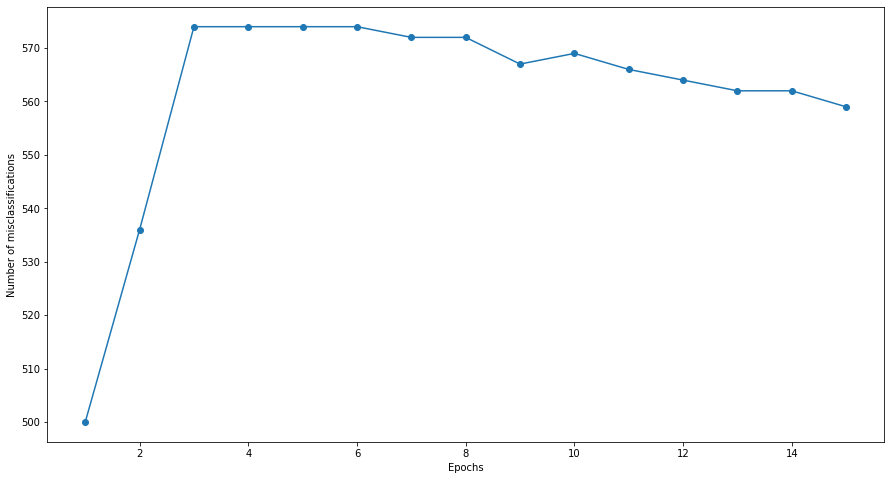

In [240]:
# I gave a very slove learning rate
pn = Perceptron(0.001, 15)

pn.fit(normalized_X, y)
plt.figure(figsize=(15,8))
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [244]:
pn.errors

[500, 536, 574, 574, 574, 574, 572, 572, 567, 569, 566, 564, 562, 562, 559]

In [245]:
pn.weight

array([-0.25398378,  0.01168598,  0.20109579,  0.13131388,  0.05883238,
        0.05925799,  0.0200192 ,  0.23640822,  0.18630825])

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?